In [6]:
tickers = ["AMZN", "TSLA", "BABA", "HD", "TM", "NKE", "MCD", "LOW", "SBUX", "JD", "PDD", "BKNG", "GM", "MELI", "TJX", "NIO", "F", "LULU", "HMC", "CMG"]

In [7]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas

%matplotlib inline

## Policies

Here, we define the four policies we will apply to each ticker's time series. Eventually, the various supervised models will classify a vector of technical indicators to the corresponding (predicted) optimal strategy.

The strategy choices were derived from the centroids discovered in the unsupervised component of the project.

Most stocks exhibited centers that suggest movement by momentum, weather in the positive or negative direction. Hence, the *longHold* strategy buys at the beginning, and sells to the end of the period. Similarly, the *shortHold* strategy sells at the beginning, and buys back the shares at the end of the period ([more about short investments here](https://www.investopedia.com/terms/s/shortselling.asp)).

Generally, the observed stocks also formed clusters around pivot points. Technical indicators signifying overvalue price align with peaks, and those representing undervalued price align with valleys. This scenario also involves volume and volatility, as these measures often contribute zig-zag like charts. Although greater profit potential is present by identifying the peaks and valleys, doing so greedily may lead to missing profit altogether, or taking a loss. Hence, the last two policies reflect long and short swing trading. We make the underlying assumption that humans, on average, realize 50% of total potential gains when swing trading, accounting for risk.

In [8]:
def longHold(series):
    return series['Close'].iloc[-1] - series['Close'].iloc[0]

def shortHold(series):
    return -1 * longHold(series)

efficiency = 0.5

def longGreedy(series):
    maxI = series['High'].values.argmax()
    minI = series['Low'].values.argmin()
    
    buyPrice = (series['Low'].iloc[minI] - series['Close'].iloc[0]) * efficiency + series['Close'].iloc[0]
    
    if minI < maxI:
        sellPrice = (series['High'].iloc[maxI] - buyPrice) * efficiency + buyPrice
    else:
        # wait for low nonetheless, sell at end
        sellPrice = series['Close'].iloc[-1]
        
    return sellPrice - buyPrice
    
def shortGreedy(series):
    maxI = series['High'].values.argmax()
    minI = series['Low'].values.argmin()
    
    sellPrice = (series['High'].iloc[maxI] - series['Close'].iloc[0]) * efficiency + series['Close'].iloc[0]
    
    if minI > maxI:
        buyPrice = sellPrice - efficiency * (sellPrice - series['Low'].iloc[minI])
    else:
        # short at high nonetheless, buy back at end
        buyPrice = series['Close'].iloc[-1]
        
    return sellPrice - buyPrice
        

For each ticker, read the data, compute the profits resulting from each policy at each tick, and declare the optimal policy. Save the resulting data with optimal policy as the ground-truth label.

Lastly, plot a histogram showcasing the frequency of each optimal policy choice. A uniform distribution is ideal for training purposes.

AMZN policies computed


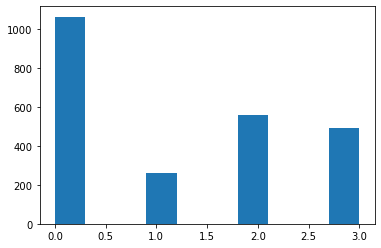

TSLA policies computed


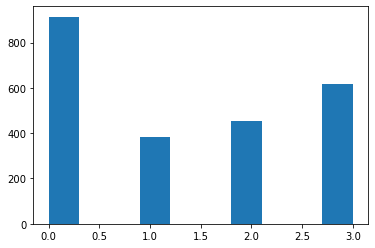

BABA policies computed


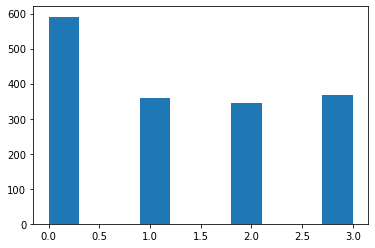

HD policies computed


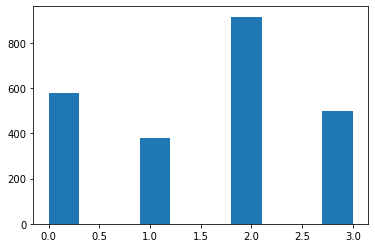

TM policies computed


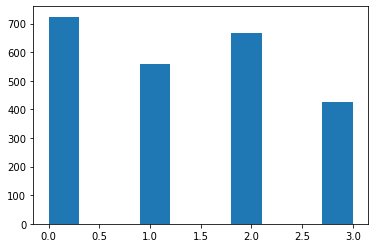

NKE policies computed


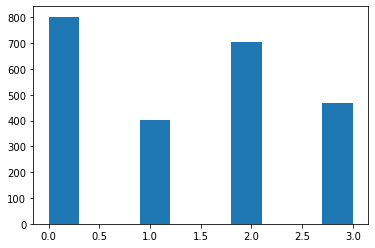

MCD policies computed


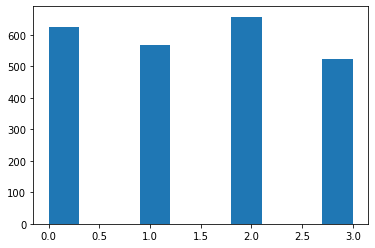

LOW policies computed


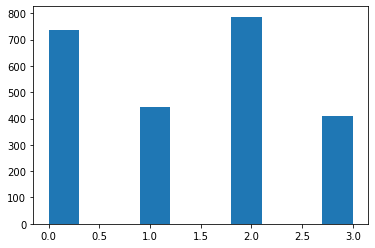

SBUX policies computed


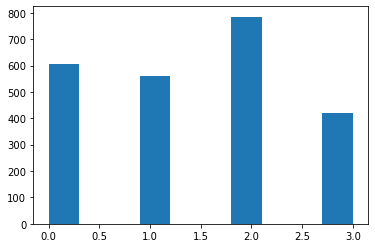

JD policies computed


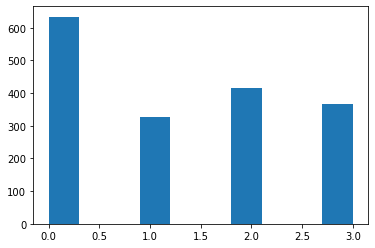

PDD policies computed


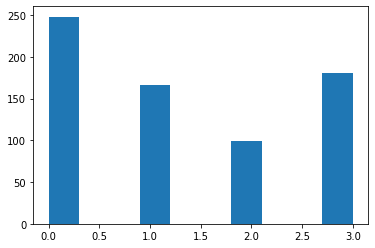

BKNG policies computed


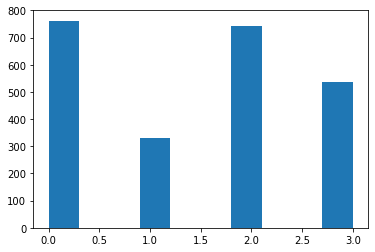

GM policies computed


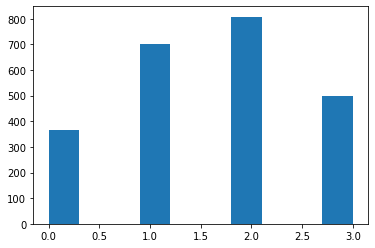

MELI policies computed


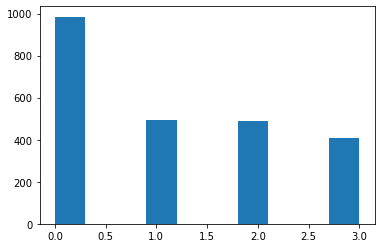

TJX policies computed


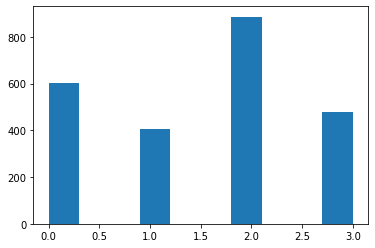

NIO policies computed


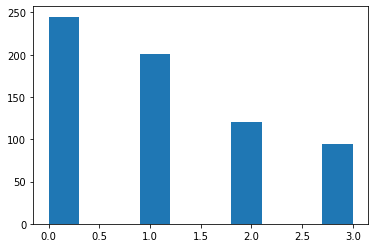

F policies computed


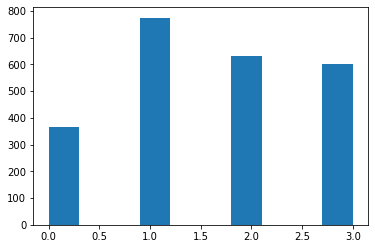

LULU policies computed


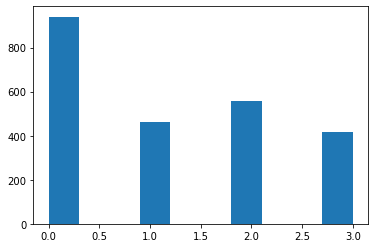

HMC policies computed


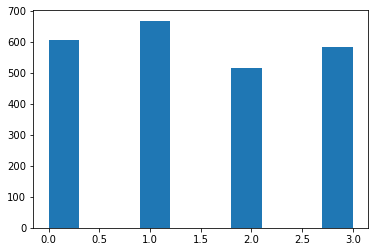

CMG policies computed


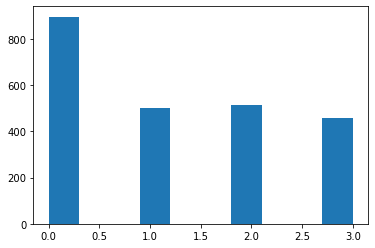

In [12]:
WINDOW_SIZE = 45

if not os.path.exists("data_with_labels"):
        os.mkdir("data_with_labels")

for ticker in tickers:
    data = pd.read_csv(f'../data/{ticker}.csv')
    optimalPolicies = []
    for i in range(data.shape[0] - WINDOW_SIZE):
        window = data[i:i+WINDOW_SIZE]
        candidates = np.array([longHold(window), shortHold(window), longGreedy(window), shortGreedy(window)])
        optimalPolicies.append(np.argmax(candidates))
    data['policy'] = pd.Series(optimalPolicies)
    for col in ['High', 'Open', "Low", "Close", "Volume"]:
        data.drop(col, axis=1, inplace=True)
    data.dropna(inplace=True)
    if not os.path.exists(f'./data_with_labels'):
        os.mkdir(f'./data_with_labels')
    data.to_csv(f'./data_with_labels/{ticker}_with_labels.csv', index=False) #write to csv file
    print(f"{ticker} policies computed")
    
    plt.hist(data['policy'])
    plt.show()
    
    
    